## Required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Dataset
The dataset contains the data which effects the education in five nations (Brazil, Russian Federation, India, China and South Africa)
The dataset contains the details from 1970 to 2019

In [2]:
#Read the Dataset
var=pd.read_csv('../BRICS Development Indicators/EducationAndEnviron_Data.csv',sep=';',error_bad_lines=False)
var.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,Brazil,BRA,1970.0,NaN
1,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,China,CHN,1970.0,NaN
2,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,India,IND,1970.0,NaN
3,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,Russian Federation,RUS,1970.0,NaN
4,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,South Africa,ZAF,1970.0,NaN


In [3]:
#checking for which columns contain null values
var.isnull().any() 

SeriesName      True
SeriesCode      True
CountryName     True
CountryCode     True
Year           False
Value           True
dtype: bool

In [4]:
var.shape #checking the size of dataset

(71500, 6)

In [ ]:
#var['SeriesName'].unique()

In [5]:
#looking for the number of non null values in dataset
var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71500 entries, 0 to 71499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SeriesName   71350 non-null  object 
 1   SeriesCode   71250 non-null  object 
 2   CountryName  71250 non-null  object 
 3   CountryCode  71250 non-null  object 
 4   Year         71500 non-null  float64
 5   Value        29860 non-null  float64
dtypes: float64(2), object(4)
memory usage: 3.3+ MB


# Preprocessing

In [6]:
#There are some missing values in the Value column. Dropping the rows of missing values
var.dropna(subset=['Value'],axis=0,inplace=True)
var.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
24,"Adjusted net enrollment rate, primary (% of pr...",SE.PRM.TENR,South Africa,ZAF,1970.0,67.669150
29,"Adjusted net enrollment rate, primary, female ...",SE.PRM.TENR.FE,South Africa,ZAF,1970.0,68.242070
34,"Adjusted net enrollment rate, primary, male (%...",SE.PRM.TENR.MA,South Africa,ZAF,1970.0,67.096420
55,Agricultural land (% of land area),AG.LND.AGRI.ZS,Brazil,BRA,1970.0,23.378048
56,Agricultural land (% of land area),AG.LND.AGRI.ZS,China,CHN,1970.0,39.900940


In [7]:
#Year column is in float format .Convert it to the datetime formaat
var['Year']=pd.to_datetime(var['Year'],format='%Y').dt.year
var.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
24,"Adjusted net enrollment rate, primary (% of pr...",SE.PRM.TENR,South Africa,ZAF,1970,67.669150
29,"Adjusted net enrollment rate, primary, female ...",SE.PRM.TENR.FE,South Africa,ZAF,1970,68.242070
34,"Adjusted net enrollment rate, primary, male (%...",SE.PRM.TENR.MA,South Africa,ZAF,1970,67.096420
55,Agricultural land (% of land area),AG.LND.AGRI.ZS,Brazil,BRA,1970,23.378048
56,Agricultural land (% of land area),AG.LND.AGRI.ZS,China,CHN,1970,39.900940


In [8]:
var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29860 entries, 24 to 71484
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SeriesName   29860 non-null  object 
 1   SeriesCode   29860 non-null  object 
 2   CountryName  29860 non-null  object 
 3   CountryCode  29860 non-null  object 
 4   Year         29860 non-null  int64  
 5   Value        29860 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.6+ MB


There are 285 different categories of economic data.

Data in each category is collected annual from 1970 to 2019

In [9]:
#looking for the number of unique names in SeriesName column
print(var['SeriesName'].nunique(), "unique items in SeriesName column")

285 unique items in SeriesName column


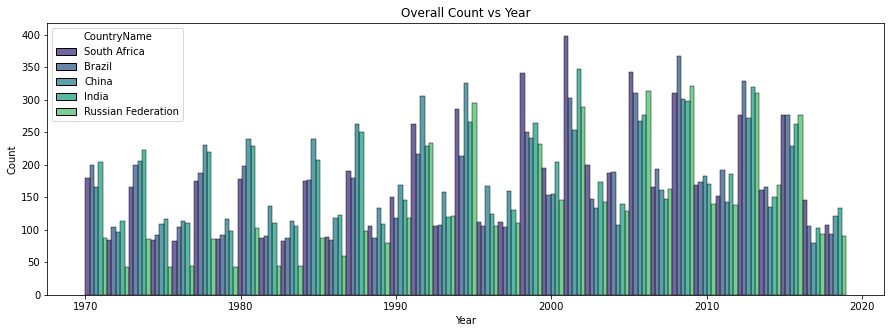

In [10]:
sns.set_palette('viridis')
plt.figure(figsize=(15,5))
sns.histplot(var,x="Year",hue='CountryName',multiple='dodge').set_title('Overall Count vs Year')
plt.show()

## Educational Attainment at different levels for 25+ male and female %(cumulative)
- Atleast Bachelor's or equivalent
- Completed Lower Secondary
- Completed Post-Secondary
- Completed Primary
- Completed short cycle tertiary
- Completed upper secondary
- At least Master's or equivalent
- Doctoral or Equivalent

In [12]:
var[var.SeriesName.str.contains('cumulative',case=False)]['SeriesName'].unique()

array(["Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)",
       "Educational attainment, at least Bachelor's or equivalent, population 25+, male (%) (cumulative)",
       "Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)",
       'Educational attainment, at least completed lower secondary, population 25+, female (%) (cumulative)',
       'Educational attainment, at least completed lower secondary, population 25+, male (%) (cumulative)',
       'Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)',
       'Educational attainment, at least completed post-secondary, population 25+, female (%) (cumulative)',
       'Educational attainment, at least completed post-secondary, population 25+, male (%) (cumulative)',
       'Educational attainment, at least completed post-secondary, population 25+, total (%) (cumulative)',
       'Educational attai

In [13]:
cumu=var[var.SeriesName.str.contains('cumulative',case=False)]
cumu

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
335,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.FE.ZS,Brazil,BRA,1970,1.01814
340,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.MA.ZS,Brazil,BRA,1970,2.94565
345,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,Brazil,BRA,1970,1.97546
350,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.FE.ZS,Brazil,BRA,1970,10.26803
354,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.FE.ZS,South Africa,ZAF,1970,29.94253
...,...,...,...,...,...,...
69070,"Educational attainment, at least Master's or e...",SE.TER.CUAT.MS.MA.ZS,Brazil,BRA,2018,1.02357
69075,"Educational attainment, at least Master's or e...",SE.TER.CUAT.MS.ZS,Brazil,BRA,2018,0.95795
69080,"Educational attainment, Doctoral or equivalent...",SE.TER.CUAT.DO.FE.ZS,Brazil,BRA,2018,0.20860
69085,"Educational attainment, Doctoral or equivalent...",SE.TER.CUAT.DO.MA.ZS,Brazil,BRA,2018,0.31359


In [14]:
cumu['Sex']=cumu['SeriesName'].apply(lambda x: 'Female' if 'female' in x else('Male' if 'male' in x else 'NA'))
cumu.sample(10)

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value,Sex
57538,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.FE.ZS,Russian Federation,RUS,2010,60.980579,Female
44714,"Educational attainment, at least completed pri...",SE.PRM.CUAT.FE.ZS,South Africa,ZAF,2001,60.324310,Female
69020,"Educational attainment, at least completed pri...",SE.PRM.CUAT.FE.ZS,Brazil,BRA,2018,80.834267,Female
64754,"Educational attainment, at least completed sho...",SE.TER.CUAT.ST.MA.ZS,South Africa,ZAF,2015,8.293070,Male
61855,"Educational attainment, at least completed pos...",SE.SEC.CUAT.PO.FE.ZS,Brazil,BRA,2013,13.993000,Female
60480,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,Brazil,BRA,2012,40.611191,NA
59034,"Educational attainment, at least completed sho...",SE.TER.CUAT.ST.MA.ZS,South Africa,ZAF,2011,6.714360,Male
60474,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.FE.ZS,South Africa,ZAF,2012,59.818909,Female
53289,"Educational attainment, at least completed pos...",SE.SEC.CUAT.PO.ZS,South Africa,ZAF,2007,10.851960,NA
59025,"Educational attainment, at least completed sho...",SE.TER.CUAT.ST.FE.ZS,Brazil,BRA,2011,12.646090,Female


In [16]:
cat=cumu[cumu.SeriesName.str.contains('male |female',case=False)]
cat.head()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value,Sex
335,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.FE.ZS,Brazil,BRA,1970,1.01814,Female
340,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.MA.ZS,Brazil,BRA,1970,2.94565,Male
350,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.FE.ZS,Brazil,BRA,1970,10.26803,Female
354,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.FE.ZS,South Africa,ZAF,1970,29.94253,Female
355,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.MA.ZS,Brazil,BRA,1970,12.79184,Male


##### Adding new column category to the dataset on the basis of differentiated categories

In [17]:
def categories(a):
    if 'Bachelor' in a:
        return 'Bachelor'
    elif 'lower secondary' in a:
        return 'Lower Secondary'
    elif 'post-secondary' in a:
        return "Post Secondary"
    elif 'short-cycle tertiary' in a:
        return "Tertiary"
    elif 'upper secondary' in a:
        return "Upper Secondary"
    elif 'Master' in a:
        return "Master's"
    elif "Doctoral" in a:
        return "Doctorate"
    else:
        'NONE'

cat['Category']=cat['SeriesName'].apply(lambda x: categories(x))

In [18]:
cat.sample(10)

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value,Sex,Category
69010,"Educational attainment, at least completed pos...",SE.SEC.CUAT.PO.MA.ZS,Brazil,BRA,2018,14.547340,Male,Post Secondary
17576,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.MA.ZS,China,CHN,1982,8.917700,Male,Upper Secondary
57583,"Educational attainment, at least completed pri...",SE.PRM.CUAT.FE.ZS,Russian Federation,RUS,2010,99.234322,Female,None
385,"Educational attainment, at least completed pri...",SE.PRM.CUAT.MA.ZS,Brazil,BRA,1970,32.510181,Male,None
64704,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.FE.ZS,South Africa,ZAF,2015,75.432854,Female,Lower Secondary
66180,"Educational attainment, at least completed sho...",SE.TER.CUAT.ST.MA.ZS,Brazil,BRA,2016,13.561300,Male,Tertiary
57554,"Educational attainment, at least completed low...",SE.SEC.CUAT.LO.FE.ZS,South Africa,ZAF,2010,70.219437,Female,Lower Secondary
21834,"Educational attainment, at least completed pri...",SE.PRM.CUAT.FE.ZS,South Africa,ZAF,1985,32.422989,Female,None
60440,"Educational attainment, at least completed pri...",SE.PRM.CUAT.FE.ZS,Brazil,BRA,2012,78.446747,Female,None
54739,"Educational attainment, at least completed sho...",SE.TER.CUAT.ST.FE.ZS,South Africa,ZAF,2008,4.247490,Female,Tertiary


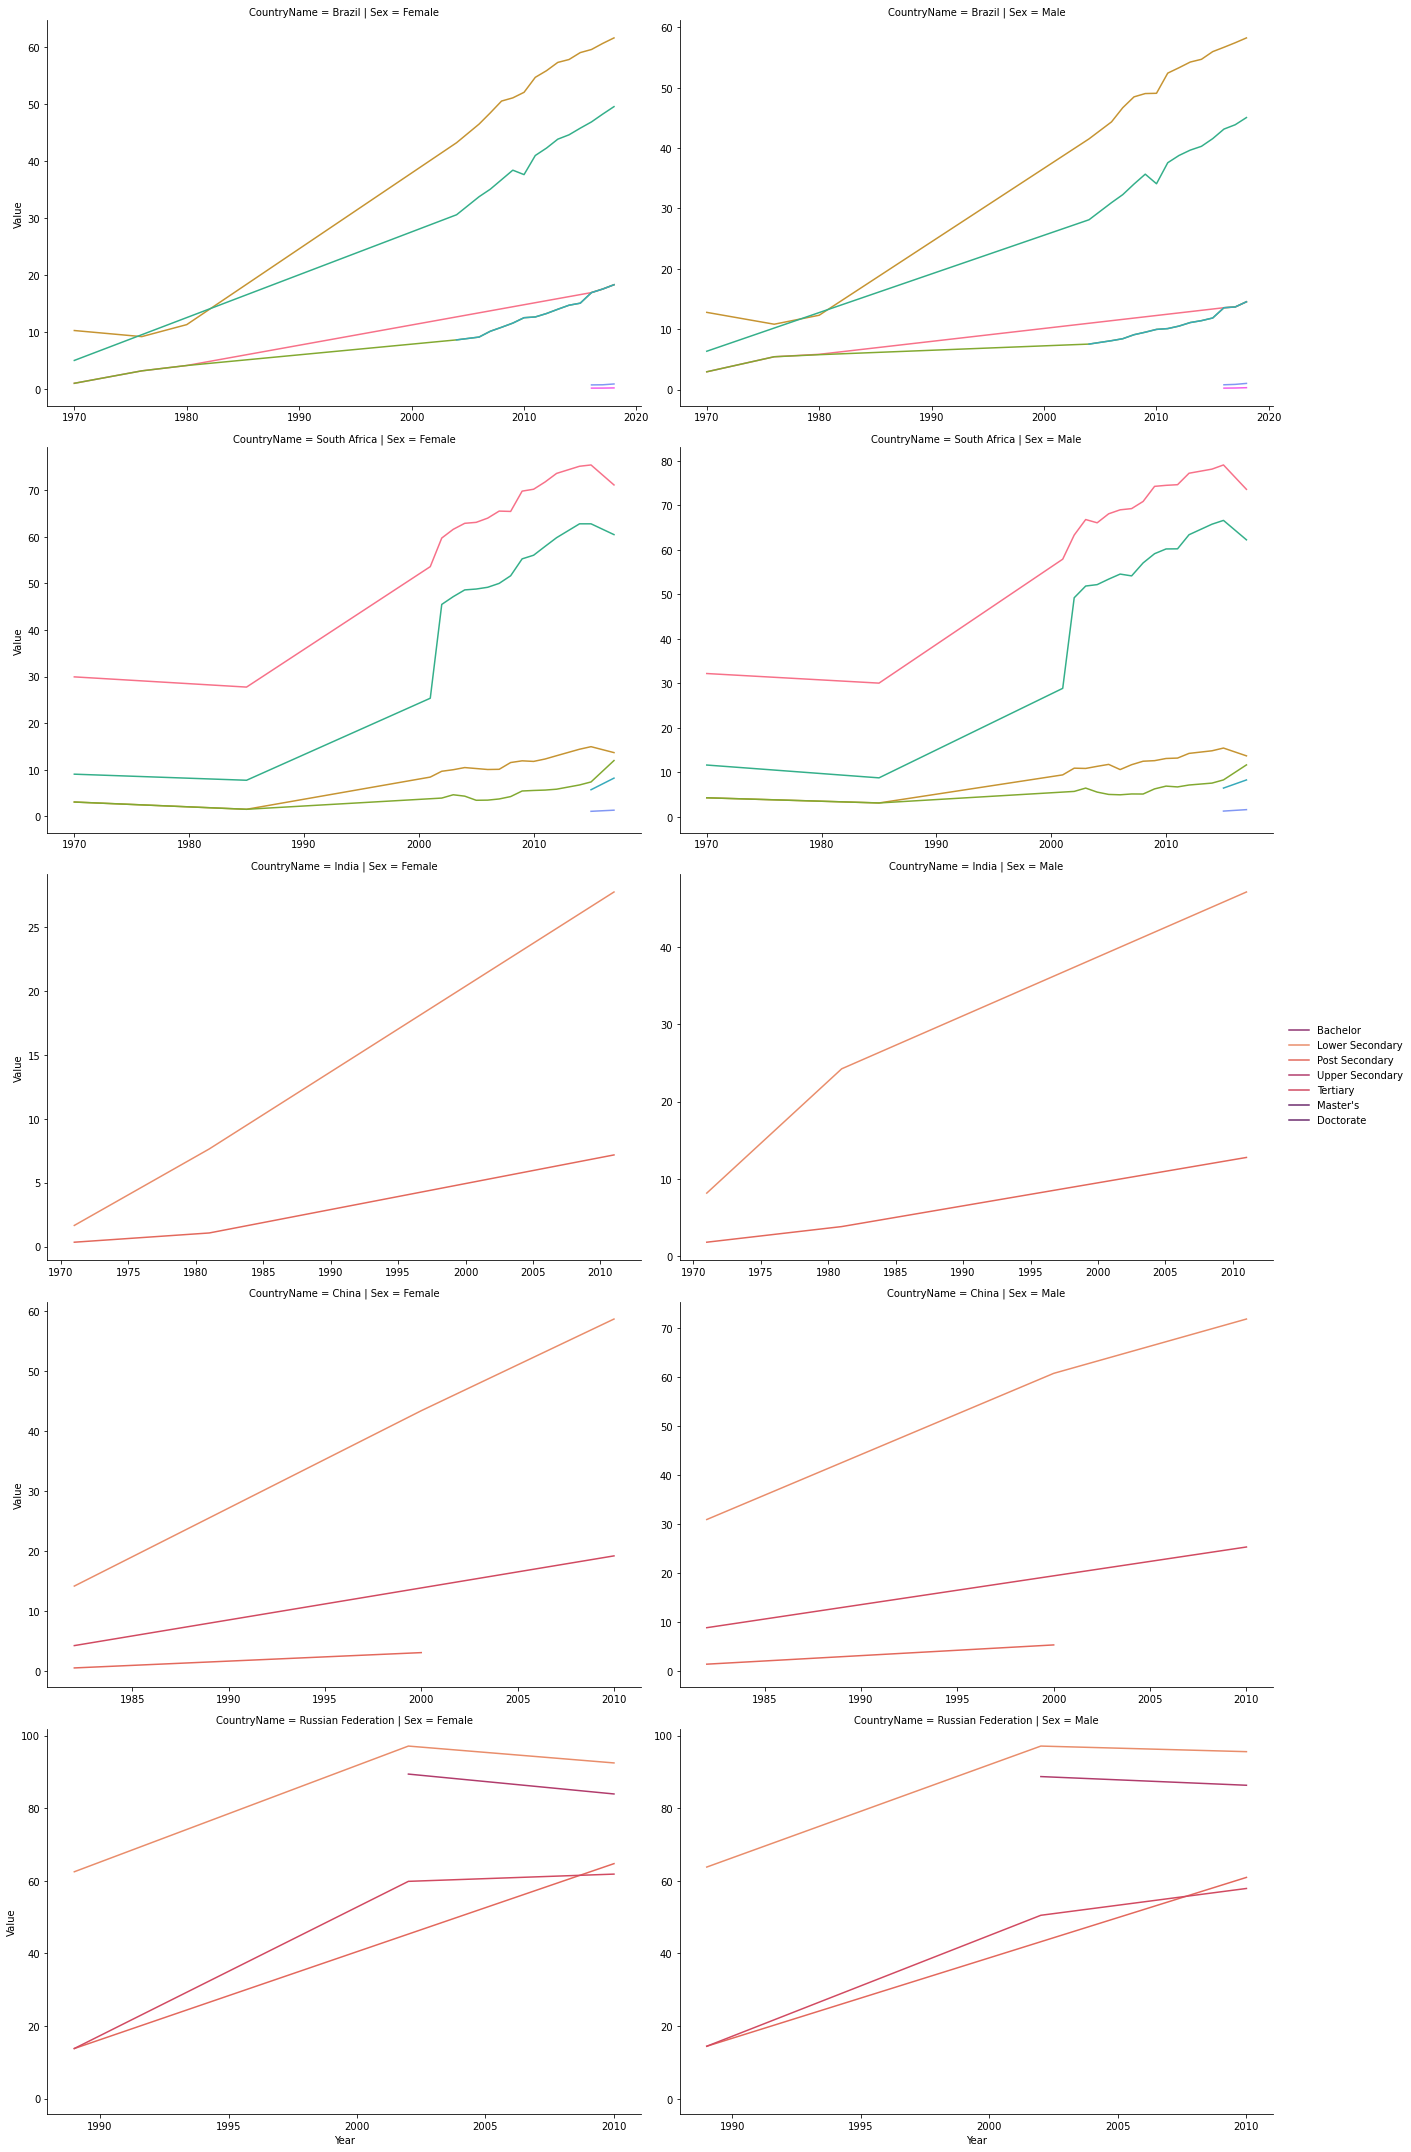

In [19]:
sns.set_palette('flare')
g=sns.FacetGrid(data=cat,col='Sex',row='CountryName',height=6,aspect=1.5,sharex=False,sharey=False)
g.map(sns.lineplot,'Year','Value','Category')
g.fig.tight_layout()
g.add_legend()
#g.set_title("Educational Attainment")
plt.show()

## School enrollment %gross male and female
- Preprimary
- Primary
- Secondary
- Tertiary

In [20]:
var[var.SeriesName.str.contains('School enrollment' and '% gross',case=False)]['SeriesName'].unique()

array(['School enrollment, primary (% gross)',
       'School enrollment, primary, female (% gross)',
       'School enrollment, primary, male (% gross)',
       'School enrollment, secondary (% gross)',
       'School enrollment, tertiary (% gross)',
       'School enrollment, preprimary (% gross)',
       'School enrollment, preprimary, female (% gross)',
       'School enrollment, preprimary, male (% gross)',
       'School enrollment, secondary, female (% gross)',
       'School enrollment, secondary, male (% gross)',
       'School enrollment, tertiary, female (% gross)',
       'School enrollment, tertiary, male (% gross)'], dtype=object)

In [21]:
enroll=var[var.SeriesName.str.contains('School enrollment' and '% gross',case=False)]
enroll

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
1111,"School enrollment, primary (% gross)",SE.PRM.ENRR,China,CHN,1970,107.042168
1114,"School enrollment, primary (% gross)",SE.PRM.ENRR,South Africa,ZAF,1970,99.989723
1134,"School enrollment, primary, female (% gross)",SE.PRM.ENRR.FE,South Africa,ZAF,1970,99.438751
1144,"School enrollment, primary, male (% gross)",SE.PRM.ENRR.MA,South Africa,ZAF,1970,100.540512
1156,"School enrollment, secondary (% gross)",SE.SEC.ENRR,China,CHN,1970,27.470350
...,...,...,...,...,...,...
71267,"School enrollment, tertiary (% gross)",SE.TER.ENRR,India,IND,2019,28.572901
71276,"School enrollment, tertiary, female (% gross)",SE.TER.ENRR.FE,China,CHN,2019,59.469921
71277,"School enrollment, tertiary, female (% gross)",SE.TER.ENRR.FE,India,IND,2019,30.217960
71281,"School enrollment, tertiary, male (% gross)",SE.TER.ENRR.MA,China,CHN,2019,48.724918


In [22]:
enroll["SeriesName"].unique()

array(['School enrollment, primary (% gross)',
       'School enrollment, primary, female (% gross)',
       'School enrollment, primary, male (% gross)',
       'School enrollment, secondary (% gross)',
       'School enrollment, tertiary (% gross)',
       'School enrollment, preprimary (% gross)',
       'School enrollment, preprimary, female (% gross)',
       'School enrollment, preprimary, male (% gross)',
       'School enrollment, secondary, female (% gross)',
       'School enrollment, secondary, male (% gross)',
       'School enrollment, tertiary, female (% gross)',
       'School enrollment, tertiary, male (% gross)'], dtype=object)

In [23]:
enroll['Sex']=enroll['SeriesName'].apply(lambda x: 'Female' if 'female' in x else('Male' if 'male' in x else 'NA'))
enroll.sample(10)

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value,Sex
48360,"School enrollment, secondary, female (% gross)",SE.SEC.ENRR.FE,Brazil,BRA,2003,107.328438,Female
45512,"School enrollment, secondary, male (% gross)",SE.SEC.ENRR.MA,India,IND,2001,51.839371,Male
48386,"School enrollment, tertiary (% gross)",SE.TER.ENRR,China,CHN,2003,15.452680,NA
46890,"School enrollment, primary, female (% gross)",SE.PRM.ENRR.FE,Brazil,BRA,2002,141.545532,Female
48397,"School enrollment, tertiary, female (% gross)",SE.TER.ENRR.FE,India,IND,2003,8.575290,Female
39711,"School enrollment, preprimary, female (% gross)",SE.PRE.ENRR.FE,China,CHN,1997,26.753210,Female
66993,"School enrollment, tertiary, male (% gross)",SE.TER.ENRR.MA,Russian Federation,RUS,2016,73.877373,Male
49832,"School enrollment, tertiary, male (% gross)",SE.TER.ENRR.MA,India,IND,2004,12.891500,Male
48346,"School enrollment, secondary (% gross)",SE.SEC.ENRR,China,CHN,2003,62.141129,NA
2628,"School enrollment, tertiary (% gross)",SE.TER.ENRR,Russian Federation,RUS,1971,45.265202,NA


In [24]:
def catego(a):
    if 'preprimary' in a:
        return "Pre-primary"
    elif 'primary' in a:
        return 'Primary'
    elif 'secondary' in a:
        return 'Secondary'
    elif 'tertiary' in a:
        return "Tertiary"
    else:
        'NONE'

enroll['Category']=enroll['SeriesName'].apply(lambda x: catego(x))

In [25]:
enroll.sample(5)

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value,Sex,Category
52578,"School enrollment, preprimary (% gross)",SE.PRE.ENRR,Russian Federation,RUS,2006,70.146751,NA,Pre-primary
48372,"School enrollment, secondary, male (% gross)",SE.SEC.ENRR.MA,India,IND,2003,54.259880,Male,Secondary
9777,"School enrollment, tertiary (% gross)",SE.TER.ENRR,India,IND,1976,4.967160,NA,Tertiary
22657,"School enrollment, tertiary, female (% gross)",SE.TER.ENRR.FE,India,IND,1985,3.559280,Female,Tertiary
21192,"School enrollment, secondary, female (% gross)",SE.SEC.ENRR.FE,India,IND,1984,23.682211,Female,Secondary


In [26]:
enroll['Category'].unique()

array(['Primary', 'Secondary', 'Tertiary', 'Pre-primary'], dtype=object)

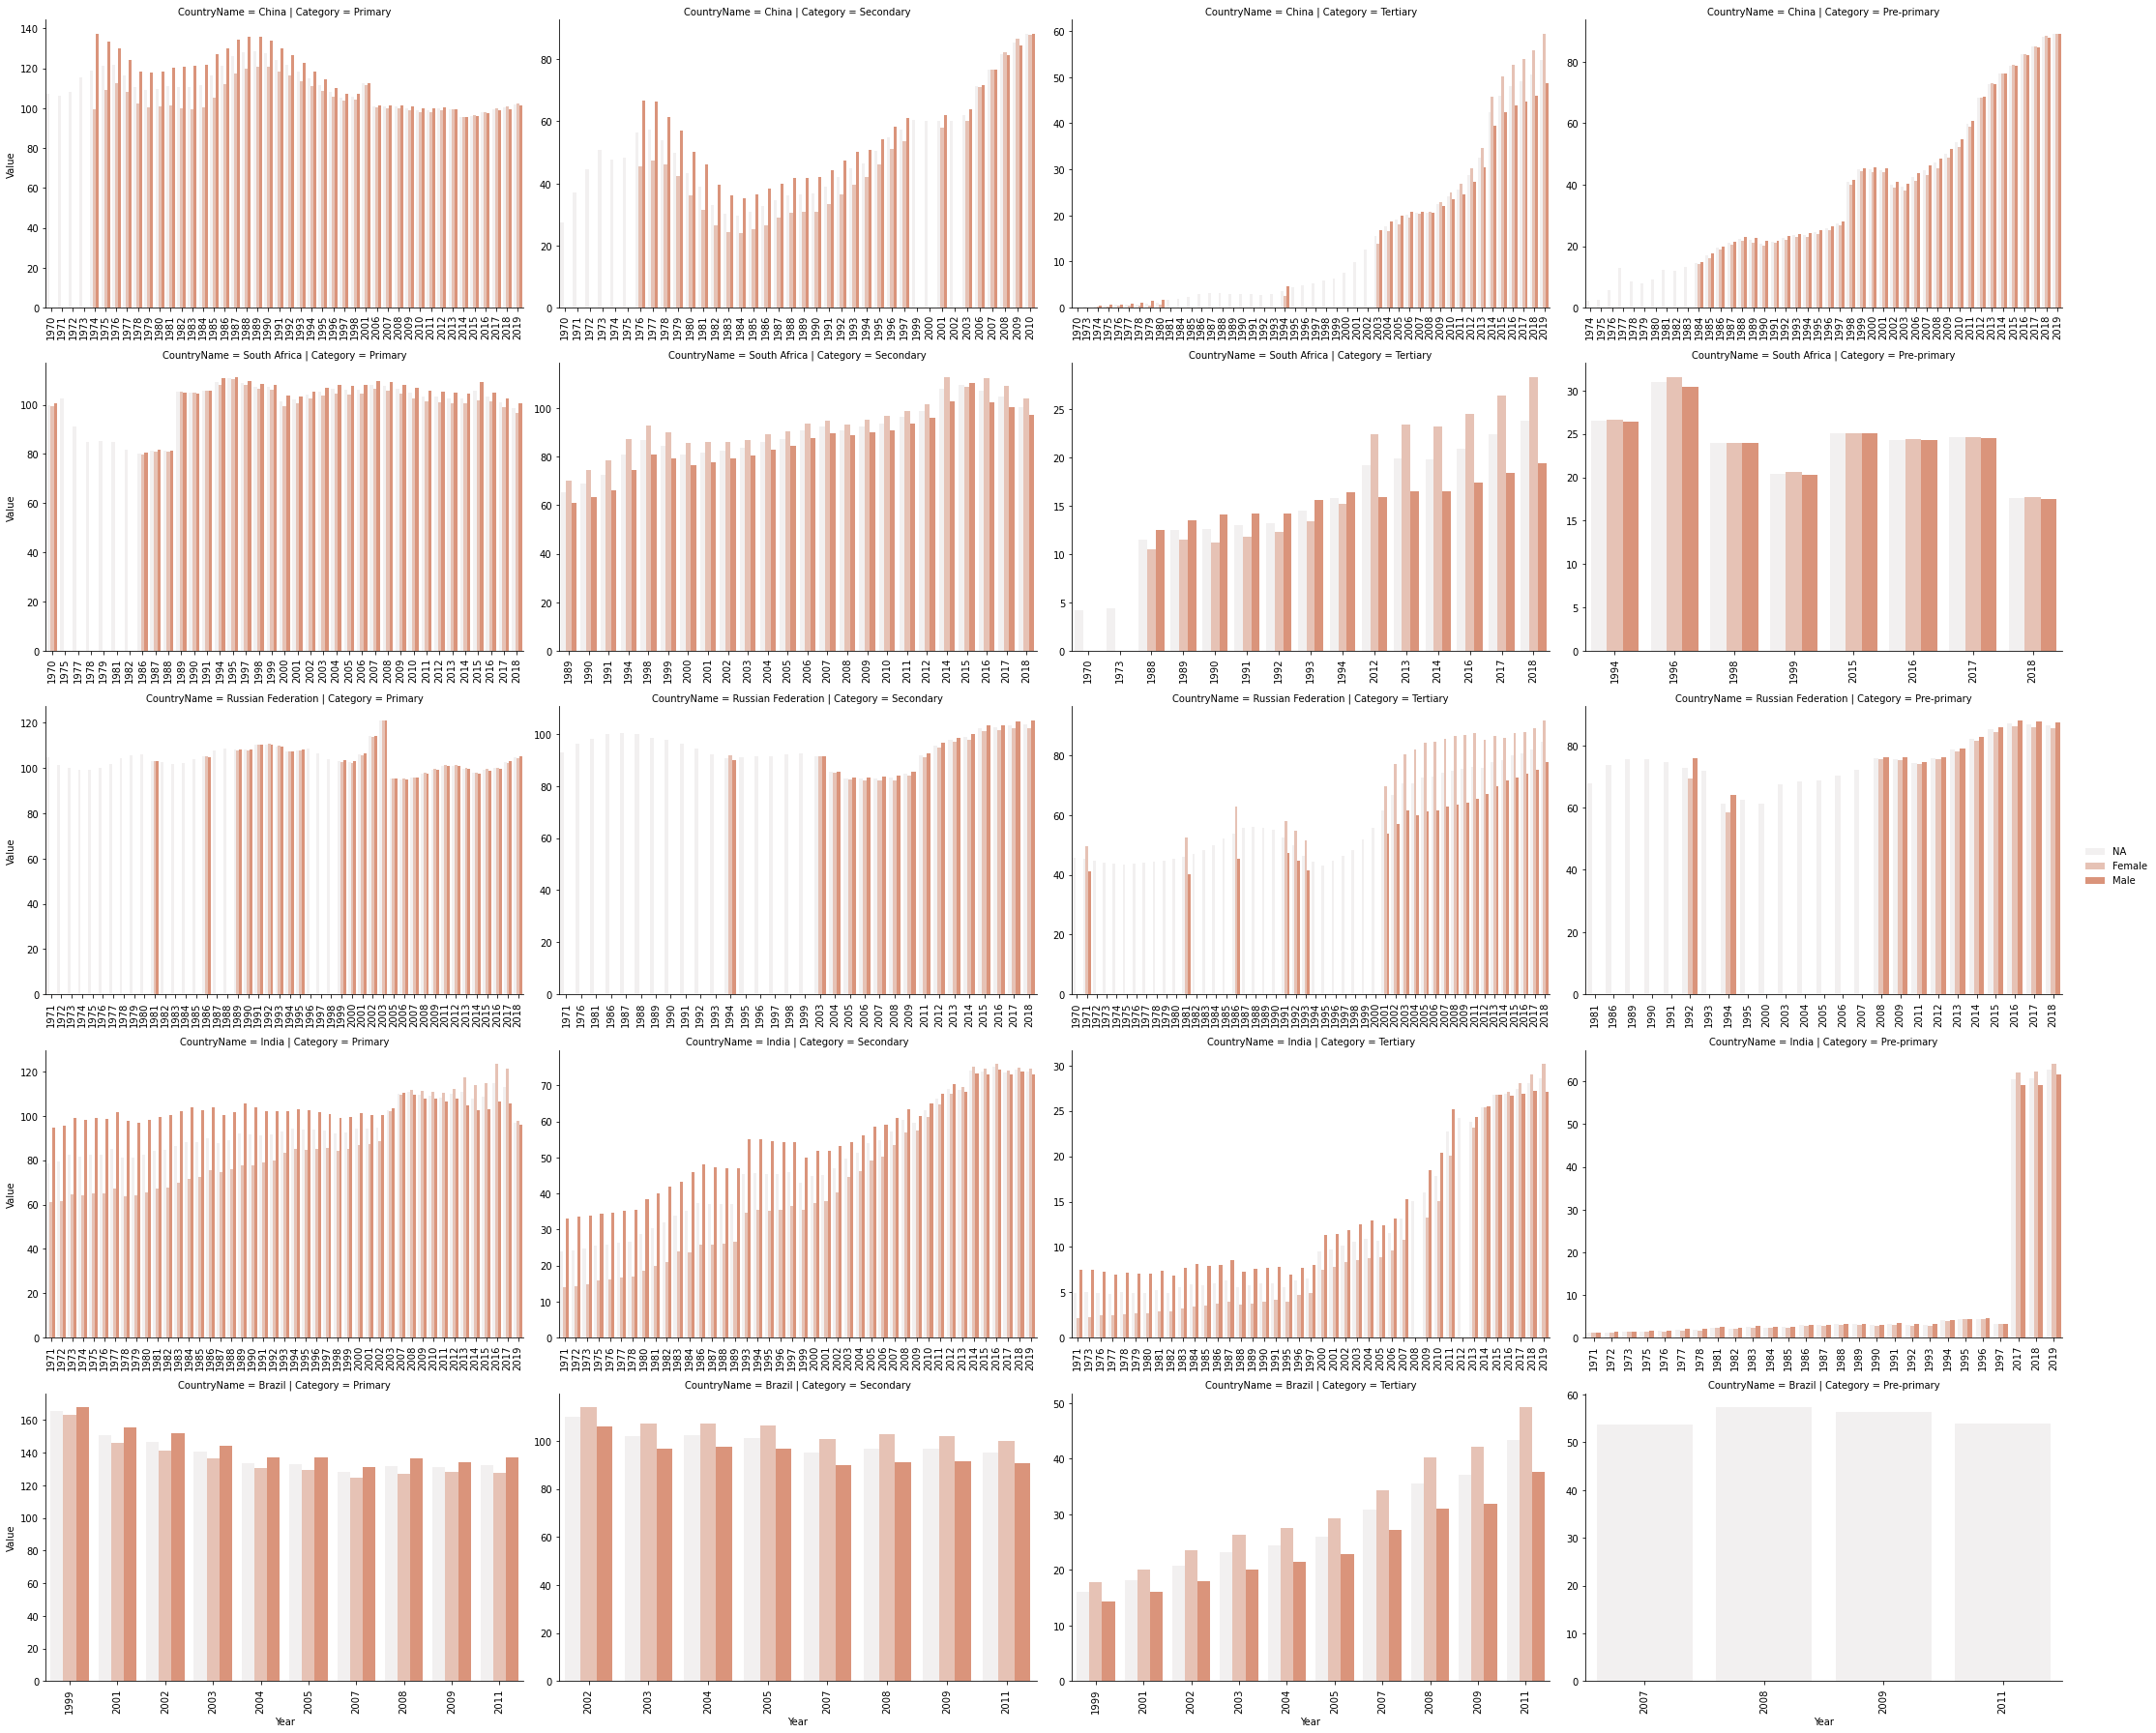

In [27]:
sns.set_palette('flare')
g = sns.FacetGrid(data=enroll, row='CountryName', col='Category',
                  sharex=False, sharey=False, height=5, aspect=1.5)
g.map(sns.barplot, 'Year', 'Value','Sex')
g.set_xticklabels(rotation=90)
g.fig.tight_layout()
g.add_legend()
plt.show()

##### Comparing the people of primary and secondary education 

In [28]:
var[(var.SeriesName=='Secondary education, pupils')|(var.SeriesName=="Primary education, pupils")]['SeriesName'].unique()

array(['Primary education, pupils', 'Secondary education, pupils'],
      dtype=object)

In [29]:
sec_edu=var[(var.SeriesName=='Secondary education, pupils')|(var.SeriesName=="Primary education, pupils")]

In [30]:
sec_edu

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
955,"Primary education, pupils",SE.PRM.ENRL,Brazil,BRA,1970,12812029.0
956,"Primary education, pupils",SE.PRM.ENRL,China,CHN,1970,100668000.0
959,"Primary education, pupils",SE.PRM.ENRL,South Africa,ZAF,1970,3988514.0
1230,"Secondary education, pupils",SE.SEC.ENRL,Brazil,BRA,1970,4086073.0
1231,"Secondary education, pupils",SE.SEC.ENRL,China,CHN,1970,20253372.0
...,...,...,...,...,...,...
69874,"Secondary education, pupils",SE.SEC.ENRL,South Africa,ZAF,2018,4878960.0
71026,"Primary education, pupils",SE.PRM.ENRL,China,CHN,2019,104325248.0
71027,"Primary education, pupils",SE.PRM.ENRL,India,IND,2019,120064160.0
71301,"Secondary education, pupils",SE.SEC.ENRL,China,CHN,2019,86101696.0


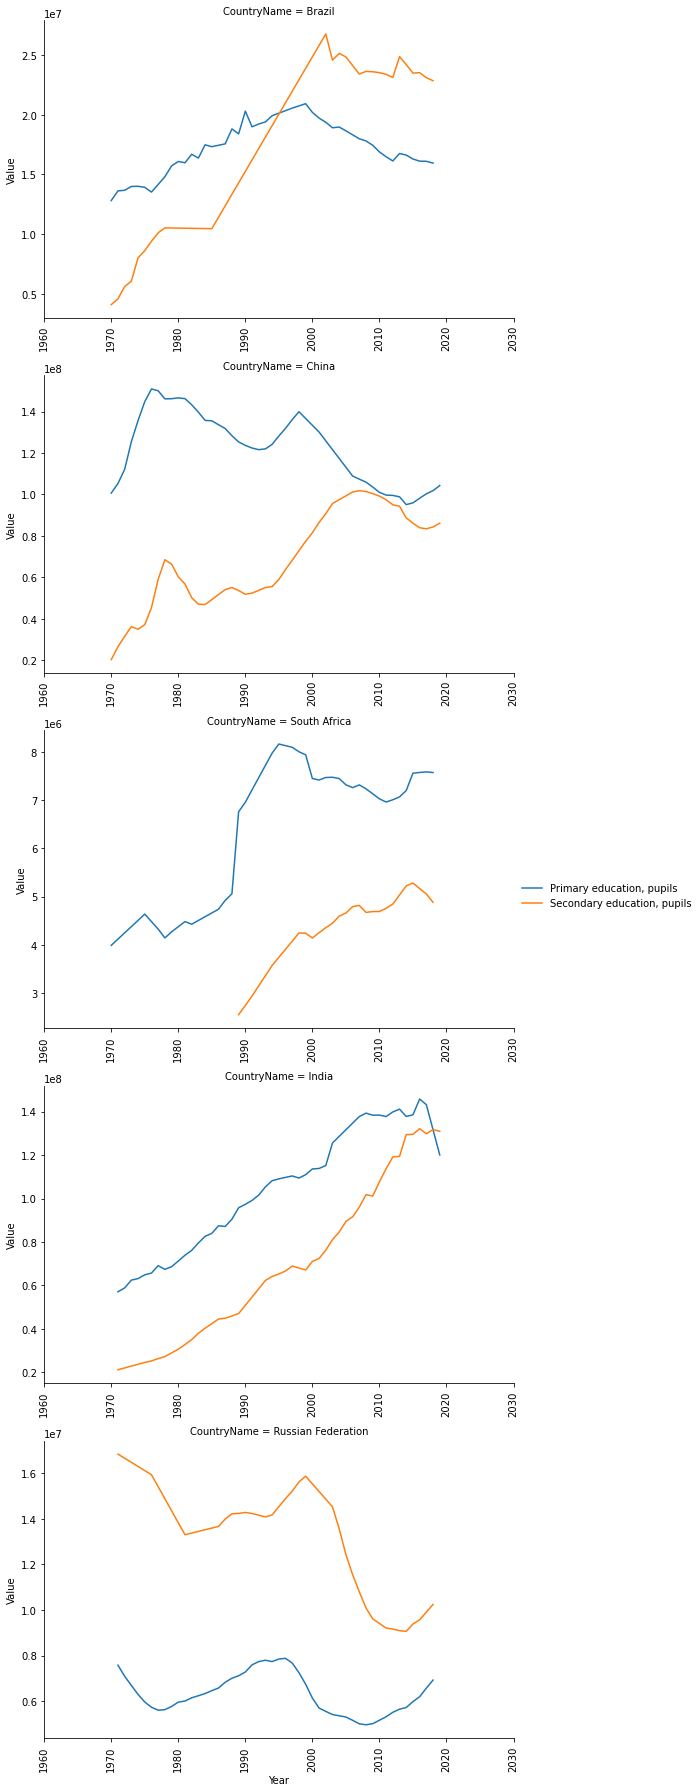

In [31]:
sns.set_palette('tab10')
g = sns.FacetGrid(data=sec_edu, row='CountryName',
                  sharex=False, sharey=False, height=5, aspect=1.5)
g.map(sns.lineplot, 'Year', 'Value','SeriesName')
g.set_xticklabels(rotation=90)
g.fig.tight_layout()
g.add_legend()

## Comparing the education in rural and urban area 
- Rural land area (sq. km)
- Rural land area where elevation is below 5 meters (sq. km / % of total land area)
- Urban land area (sq. km)
- Urban land area where elevation is below 5 meters (sq. km / % of total land area)


In [32]:
var[var.SeriesName.str.contains('Rural land|urban land',case=False)]['SeriesName'].unique()

array(['Rural land area (sq. km)',
       'Rural land area where elevation is below 5 meters (% of total land area)',
       'Rural land area where elevation is below 5 meters (sq. km)',
       'Urban land area (sq. km)',
       'Urban land area where elevation is below 5 meters (% of total land area)',
       'Urban land area where elevation is below 5 meters (sq. km)'],
      dtype=object)

In [33]:
ru=var[var.SeriesName.str.contains('Rural land|urban land',case=False)]

In [34]:
ru.shape

(90, 6)

In [35]:
ru

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
29660,Rural land area (sq. km),AG.LND.TOTL.RU.K2,Brazil,BRA,1990,8.241430e+06
29661,Rural land area (sq. km),AG.LND.TOTL.RU.K2,China,CHN,1990,8.868577e+06
29662,Rural land area (sq. km),AG.LND.TOTL.RU.K2,India,IND,1990,2.980489e+06
29663,Rural land area (sq. km),AG.LND.TOTL.RU.K2,Russian Federation,RUS,1990,1.630583e+07
29664,Rural land area (sq. km),AG.LND.TOTL.RU.K2,South Africa,ZAF,1990,5.346031e+04
...,...,...,...,...,...,...
58595,Urban land area where elevation is below 5 met...,AG.LND.EL5M.UR.K2,Brazil,BRA,2010,3.425557e+03
58596,Urban land area where elevation is below 5 met...,AG.LND.EL5M.UR.K2,China,CHN,2010,2.392851e+04
58597,Urban land area where elevation is below 5 met...,AG.LND.EL5M.UR.K2,India,IND,2010,3.699181e+03
58598,Urban land area where elevation is below 5 met...,AG.LND.EL5M.UR.K2,Russian Federation,RUS,2010,1.645535e+03


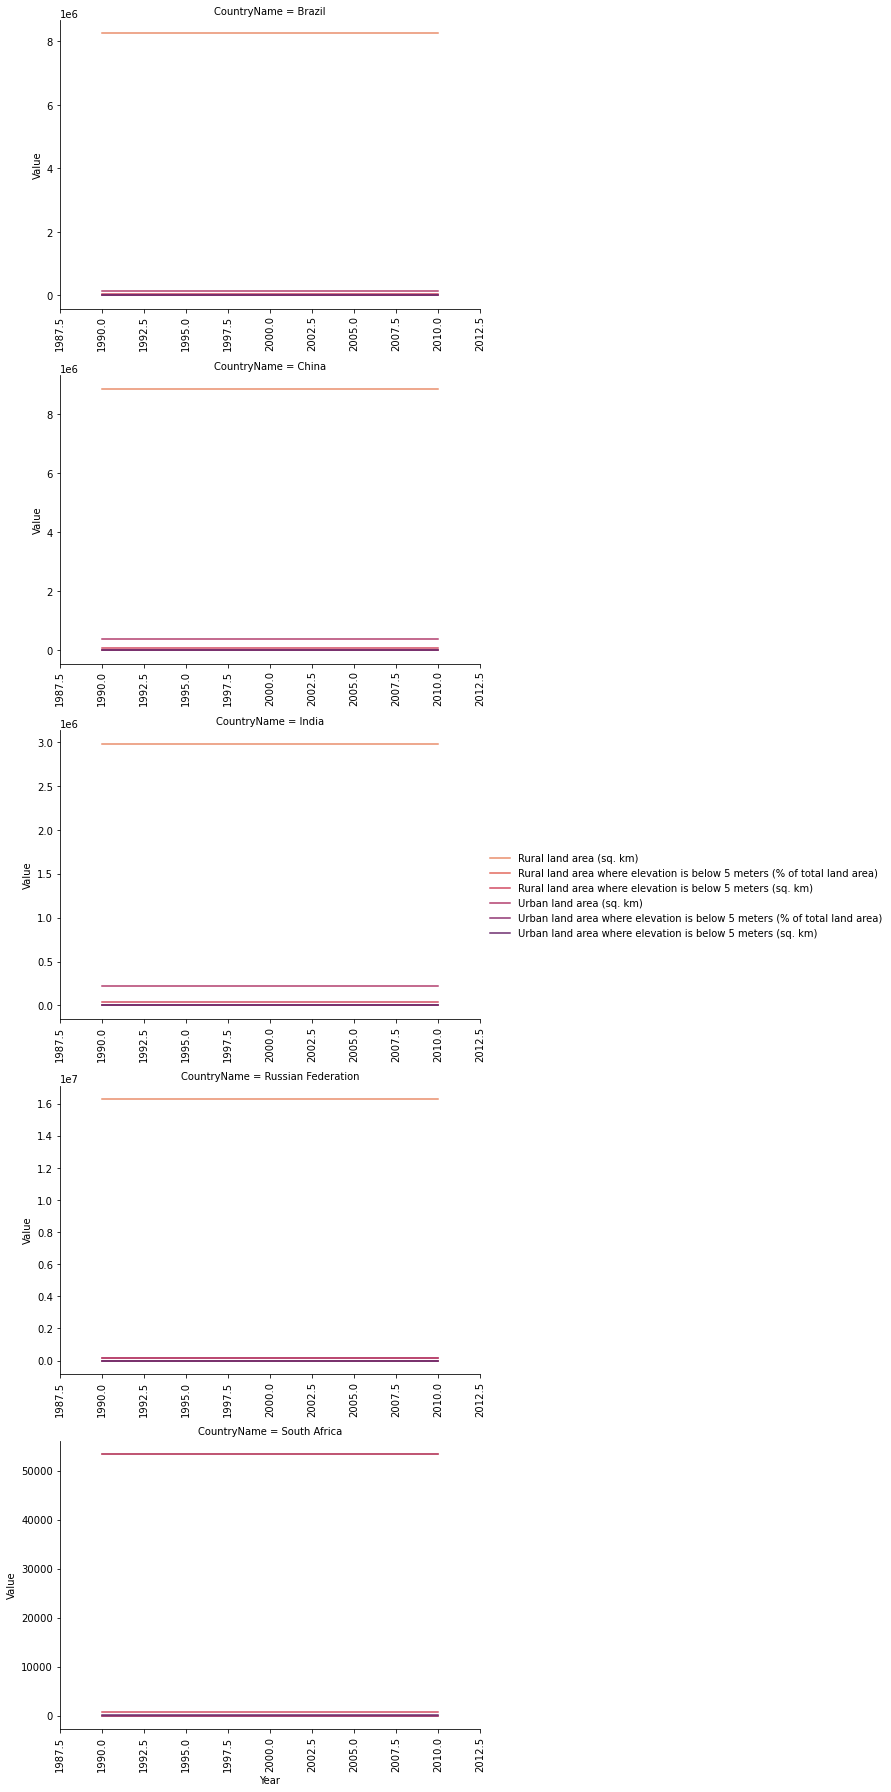

In [36]:
sns.set_palette('flare')
g = sns.FacetGrid(data=ru, row='CountryName',
                  sharex=False, sharey=False, height=5, aspect=1.5)
g.map(sns.lineplot, 'Year', 'Value','SeriesName')
g.set_xticklabels(rotation=90)
g.fig.tight_layout()
g.add_legend()

## Population living in slums

In [37]:
var[var.SeriesName.str.contains('Population living in slums',case=False)]['SeriesName'].unique()

array(['Population living in slums (% of urban population)'], dtype=object)

In [38]:
slums=var[var.SeriesName.str.contains('Population living in slums',case=False)]

In [39]:
slums.shape

(31, 6)

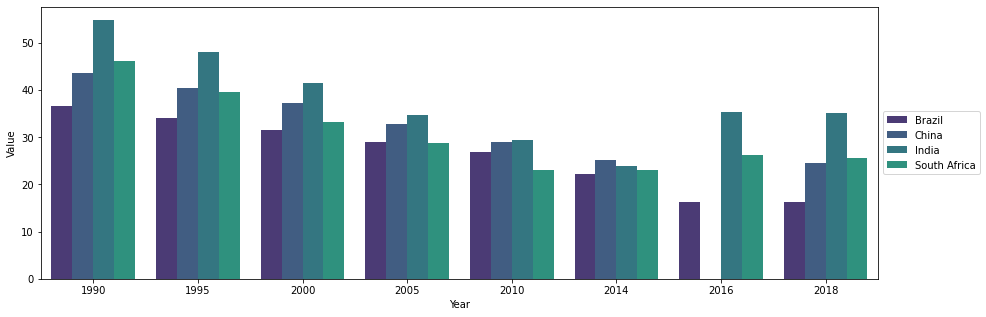

In [40]:
sns.set_palette('viridis')
plt.figure(figsize=(15,5))
sns.barplot(data=slums,x='Year',y='Value',hue="CountryName")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [41]:
var[var.SeriesName.str.contains('Adolescents',case=False)]['SeriesName'].unique()

array(['Adolescents out of school (% of lower secondary school age)',
       'Adolescents out of school, female (% of female lower secondary school age)',
       'Adolescents out of school, male (% of male lower secondary school age)'],
      dtype=object)

In [42]:
ado=var[var.SeriesName.str.contains('Adolescents',case=False)]

In [43]:
ado['Sex']=ado['SeriesName'].apply(lambda x: 'Female' if 'female' in x else('Male' if 'male' in x else 'NA'))

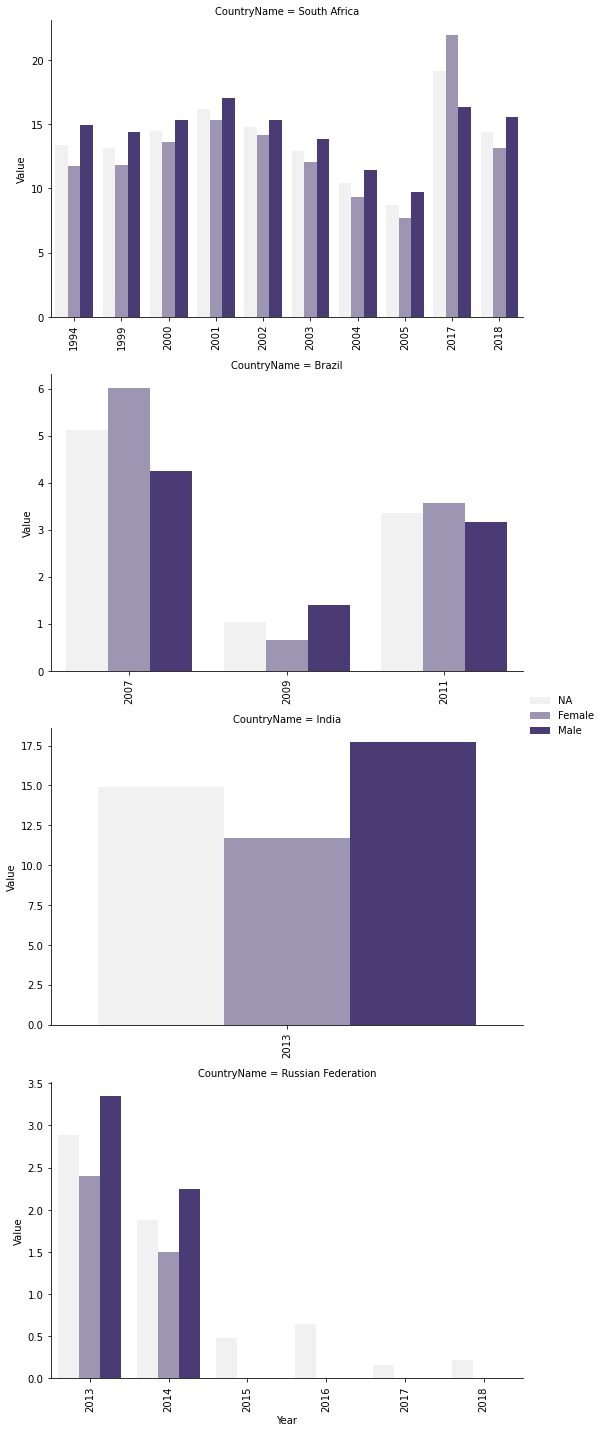

In [44]:
sns.set_palette('viridis')
g = sns.FacetGrid(data=ado, row='CountryName',
                  sharex=False, sharey=False, height=5, aspect=1.5)
g.map(sns.barplot, 'Year', 'Value','Sex')
g.set_xticklabels(rotation=90)
g.fig.tight_layout()
g.add_legend()

## Current education expenditure 
- primary
- secondary
- tertiary
- total

In [45]:
var[var.SeriesName.str.contains('Current education expenditure',case=False)]['SeriesName'].unique()

array(['Current education expenditure, primary (% of total expenditure in primary public institutions)',
       'Current education expenditure, secondary (% of total expenditure in secondary public institutions)',
       'Current education expenditure, tertiary (% of total expenditure in tertiary public institutions)',
       'Current education expenditure, total (% of total expenditure in public institutions)'],
      dtype=object)

In [46]:
expenditure=var[var.SeriesName.str.contains('Current education expenditure',case=False)]

In [47]:
expenditure.shape

(169, 6)

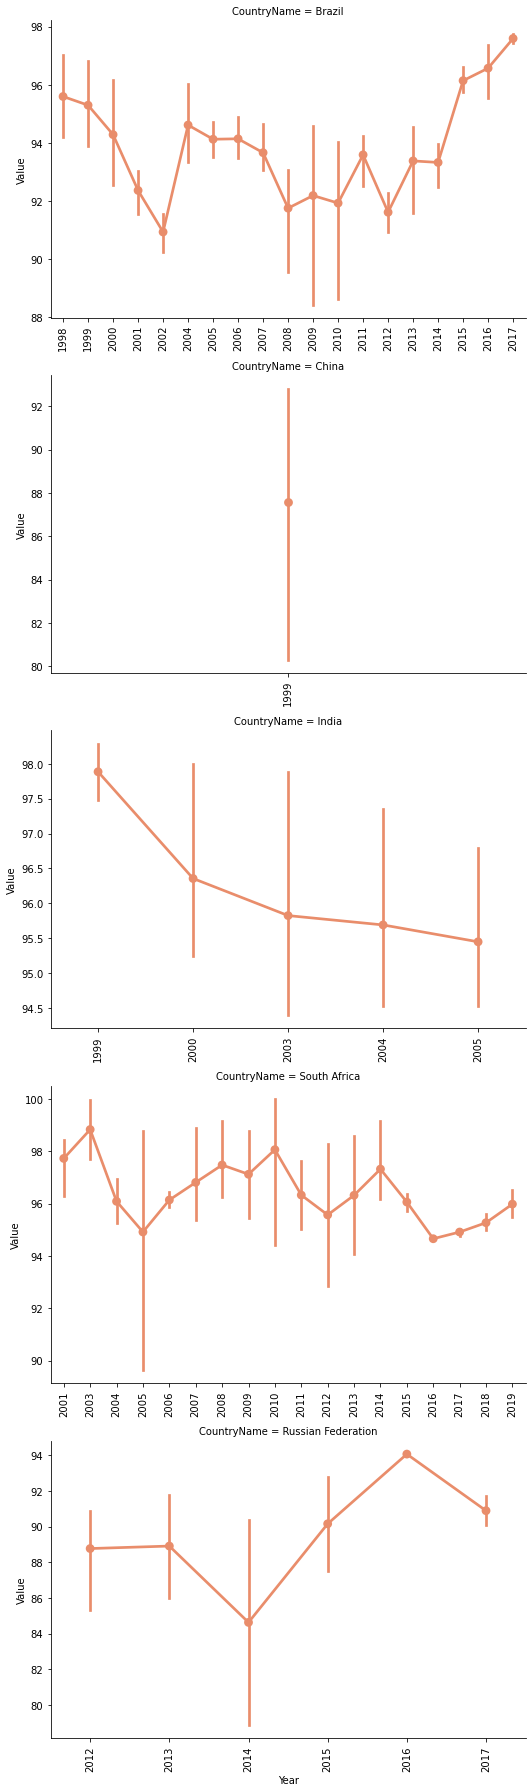

In [48]:
sns.set_palette('flare')
g = sns.FacetGrid(data=expenditure, row='CountryName',
                  sharex=False, sharey=False, height=5, aspect=1.5)
g.map(sns.pointplot, 'Year', 'Value')
g.set_xticklabels(rotation=90)
g.fig.tight_layout()
